# Librerias

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
import numpy as np

# Loading dataset

In [203]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


# Usando matplotlib para pintar una nube de puntos con el Año y CSIRO 

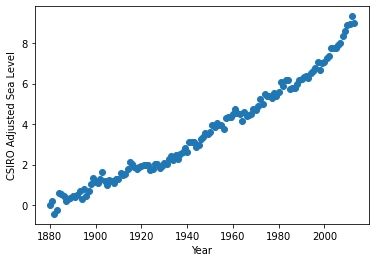

In [204]:
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])

# Creando la nueva linea que prediga el comportamiento del nivel del mar para 2050

In [205]:
""" Limpiando la columna de NOAA llena de valores nulos """
df1 = df.drop('NOAA Adjusted Sea Level', axis=1)

In [206]:
def train_val_test_split (df, rstate=42, shuffle=True, stratify=None):
    """ Funcion para dividir los datos """
    
    if stratify != None:
        strat = df[stratify]
    else:
        strat=None
    
    train_set, test_set = tts(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    if stratify != None:
        strat = test_set[stratify]
    else:
        strat=None
    test_set, val_set = tts(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [207]:
train_set, val_set, test_set = train_val_test_split(df1, rstate=42)
print('Entrenamiento:', len(train_set))
print('Validacion:', len(val_set))
print('Pruebas:', len(test_set))

Entrenamiento: 80
Validacion: 27
Pruebas: 27


## Separando las caracteristicas de entrada de las de salida

In [208]:
# Para el conjunto de datos general
x_df = df1.drop(['CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound'], axis=1)
y_df = df1['CSIRO Adjusted Sea Level'].copy()

# Para el conjunto de datos de entrenamiento
x_train = train_set.drop(['CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound'], axis=1)
y_train = train_set['CSIRO Adjusted Sea Level'].copy()

# Para el conjunto de datos de validacion 
x_val = val_set.drop(['CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound'], axis=1)
y_val = val_set['CSIRO Adjusted Sea Level'].copy()

# Conjunto de datos de pruebas
x_test = test_set.drop(['CSIRO Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound'], axis=1)
y_test = test_set['CSIRO Adjusted Sea Level'].copy()

In [209]:
""" Creacion del algoritmo """
linreg = LinearRegression()
reg = linreg.fit(x_train, y_train)

In [210]:
""" Prediccion de nuevos ejemplos """
y_pred = reg.predict(x_val)
y_pred

array([ 5.57868218,  3.54597165,  6.91264847,  1.1321279 ,  6.97617067,
        3.22836063, -0.32888279,  3.80006047,  0.62395027,  1.70382774,
        2.40257198,  5.7692488 ,  2.27552757,  0.17929484,  3.67301606,
        2.08496096,  2.97427182,  0.05225043,  3.73653827, -0.58297161,
       -0.01127177,  1.38621671,  5.832771  ,  4.68937133,  7.16673728,
        0.94156129,  6.40447084])

In [211]:
""" Analizando la precision """
reg.score(x_train, y_train)

0.9694147912603175

In [212]:
""" Prediciendo para el 2050 """
prediction = linreg.predict(np.array([[2050]]))

D:\Tirso\Programacion\Python\Python397\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NameError: name 'ax' is not defined

In [213]:
df2=df.append({'Year' : 2050 , 'CSIRO Adjusted Sea Level' : prediction[0]} , ignore_index=True)
df2

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880.0,0.000000,-0.952756,0.952756,NaN
1,1881.0,0.220472,-0.732283,1.173228,NaN
2,1882.0,-0.440945,-1.346457,0.464567,NaN
3,1883.0,-0.232283,-1.129921,0.665354,NaN
4,1884.0,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
130,2010.0,8.901575,8.618110,9.185039,8.122973
131,2011.0,8.964567,8.661417,9.267717,8.053065
132,2012.0,9.326772,8.992126,9.661417,8.457058
133,2013.0,8.980315,8.622047,9.338583,8.546648


# Best Line plot up to 2050

In [214]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Text(0.5, 1.0, 'Rise in Sea Level')

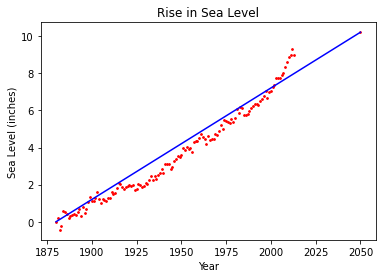

In [217]:
plt.scatter(x=df2['Year'], y=df2['CSIRO Adjusted Sea Level'], color='red', s=3)
plt.plot([df1['Year'][0], 2050], [df1['CSIRO Adjusted Sea Level'][0], prediction[0]], c='blue')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

In [2]:
ax.get_lines()[1].get_ydata()


NameError: name 'ax' is not defined

# Creando la segunda linea a partir del 2000

In [234]:
""" Making the second line df """
dfsl = df.copy()
dfsl['CSIRO Adjusted Sea Level'] = dfsl['CSIRO Adjusted Sea Level'][120:]
dfsl['Year'] = df['Year'][120:]
dfsl = dfsl.dropna()
dfsl = dfsl.drop(['Lower Error Bound', 'Upper Error Bound', 'NOAA Adjusted Sea Level'], axis=1)


,Year,CSIRO Adjusted Sea Level
120,2000.0,7.062992
121,2001.0,7.287402
122,2002.0,7.381890
123,2003.0,7.759843
124,2004.0,7.740157
125,2005.0,7.744094
126,2006.0,7.917323
127,2007.0,7.996063
128,2008.0,8.350394
129,2009.0,8.586614


## Second line algorithm

0.9411054997275448


D:\Tirso\Programacion\Python\Python397\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Rise in Sea Level')

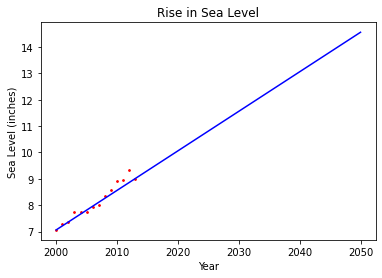

In [264]:
def train_val_test_split (df, rstate=42, shuffle=True, stratify=None):
        """ Funcion para dividir los datos """
        
        if stratify != None:
            strat = df[stratify]
        else:
            strat=None
        
        train_set, test_set = tts(df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
        if stratify != None:
            strat = test_set[stratify]
        else:
            strat=None
        test_set, val_set = tts(test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
        return (train_set, val_set, test_set)

train_set, val_set, test_set = train_val_test_split(dfsl, rstate=42)
# Para el conjunto de datos general
x_df = dfsl.drop(['CSIRO Adjusted Sea Level'], axis=1)
y_df = dfsl['CSIRO Adjusted Sea Level'].copy()

# Para el conjunto de datos de entrenamiento
x_train = train_set.drop(['CSIRO Adjusted Sea Level'], axis=1)
y_train = train_set['CSIRO Adjusted Sea Level'].copy()

# Para el conjunto de datos de validacion 
x_val = val_set.drop(['CSIRO Adjusted Sea Level'], axis=1)
y_val = val_set['CSIRO Adjusted Sea Level'].copy()

# Conjunto de datos de pruebas
x_test = test_set.drop(['CSIRO Adjusted Sea Level'], axis=1)
y_test = test_set['CSIRO Adjusted Sea Level'].copy()

""" Creacion del algoritmo """
linreg = LinearRegression()
reg = linreg.fit(x_train, y_train)

""" Prediccion de nuevos ejemplos """
y_pred = reg.predict(x_val)

""" Analizando la precision """
prec = reg.score(x_train, y_train)
print(prec)
""" Prediciendo para el 2050 """
prediction = linreg.predict(np.array([[2050]]))

""" Dibujando la prediccion """
plt.title('')
plt.scatter(x=dfsl['Year'], y=dfsl['CSIRO Adjusted Sea Level'], color='red', s=3)
plt.plot([dfsl['Year'][120], 2050], [dfsl['CSIRO Adjusted Sea Level'][120], prediction[0]], c='blue')
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')